In [1]:
from random import seed, expovariate
import random
from math import sqrt, pow
import pygame
from pygame.locals import QUIT
from coinor.blimpy import Queue, PriorityQueue
from random import random
import collections 
import heapq
import numpy as np
import matplotlib.pyplot as plt

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Event Types
ARRIVE = 0
DEPART = 1
# Server States
IDLE = 0
BUSY = 1

In [3]:
class Event(object):
    '''
    Basically there are two event types, arrival and departure, this class can
    generate instances of arrival and departure events. See the file
    documentation for description of attributes.
    '''
    def __init__(self, eventType, eventNumber, eventTime, serverNumber = None):
        '''
        Constructor of the class. Input descriptions are same as in the
        module (up) documentation, server input is optional.
        '''
        self.number = eventNumber
        self.eventType = eventType
        self.eventTime = eventTime
        self.serverNumber = serverNumber
        if self.eventType == ARRIVE:
            self.name = 'arrival'+str(self.number)
        elif self.eventType == DEPART:
            self.name = 'departure'+str(self.number)
        else:
            print("unknown event type")

    def __gt__(self, other):
        '''
        Returns True if self.eventTime > other.eventTime
        '''
        return self.eventTime > other.eventTime

    def __ge__(self, other):
        '''
        Returns True if self.eventTime >= other.eventTime
        '''
        return self.eventTime >= other.eventTime

    def __lt__(self, other):
        '''
        Returns True if self.eventTime < other.eventTime
        '''
        return self.eventTime < other.eventTime

    def __le__(self, other):
        '''
        Returns True if self.eventTime <= other.eventTime
        '''
        return self.eventTime <= other.eventTime

    def __eq__(self, other):
        '''
        returns True if self.eventTime == other.eventTime
        '''
        return self.eventTime == other.eventTime

    def __ne__(self, other):
        '''
        Returns True if self.eventTime != other.eventTime
        '''
        return self.eventTime != other.eventTime

In [4]:
class Customer(object):
    '''
    Customer class. A basic class with only constructor method and 3
    attributes.
    '''
    def  __init__(self, entryTime, serviceTime, customerNumber):
        '''
        Initializes class attributes. See module documentation for explanation
        of attributes.
        '''
        self.entryTime = entryTime
        self.serviceTime = serviceTime
        self.number = customerNumber


# Single queue single server

In [347]:
class singleQueue(object):
    '''
    This class holds the attributes and methods for the simulation of M/M/s
    queueing system
    '''
    def __init__(self, IAT = 3, ST = 8, queuelim = 10,
                 server_num = 1, queueing_mode = 'single', bar = 3):
        '''
        Constructor of the class, sets initial values for class attributes
        Post: self.ii, self.seed, self.IAT, self.ST, self.currentTime,
        self.eventTable, self.waitingTime, self.TIS, self.serviceTime,
        self.eventCounter, self.customerCounter, self.server, self.sqList
        self.pi
        '''
        self.queuelim = queuelim
        self.bar = bar
        self.ii = 0
#         seed(seedInput)
#         self.seed = seedInput
        self.IAT = IAT
        self.ST = ST
        self.currentTime = 0.0
#         self.queueSize = {}
        self.clock = []
        self.queueLen = []
        self.eventTable = []
        self.waitingTime = {}
        self.TIS = {}
        self.serviceTime = {}
        self.eventCounter = 0
        self.customerCounter = 0
        self.eventCounter = 0
        
        self.customerLow = 0
        self.customerHigh = 0
        
#         self.meanCustomerNumber = 0
        self.set_mode(server_num, queueing_mode)
        self.server = [IDLE]
        self.sqList = [Queue()]
#         self.numberInSystem = []
        self.add_event(ARRIVE, self.currentTime)

    def set_mode(self, server_num = None, queueing_mode = None):
        '''
        server_num is a positive integer queueing_mode is either 'single',
        'random', or 'shortest' graphics_mode is either string 'off' or 'on'
        '''
        if queueing_mode:
            self.queueing_mode = queueing_mode
        if server_num:
            self.server_num = server_num          
            self.queue_num = self.server_num            

    def simulate(self, simulationLength):
        '''
        Simulates the system for simulationLength time units
        '''
        while self.currentTime <= simulationLength:
            event = self.get_event()
            self.process_event(event)
            
    def which_queue(self):
        '''
        When an arrival occurs this methods is called if  there is an available
        server this method returns to the tuple of (queue,server) where queue
        represents the queue that the customer should join and server is one of
        the available servers if there is no available server, server value
        returned is None
        '''
        # Single server policy
        if self.sqList[0].isEmpty():
            if self.server[0] == IDLE:
                self.server[0] = BUSY
                return 0, 1
        else:
            return 0, None
        return 0, None
    
# need to consider which_queue: the first arrival needs to depart        
    def process_event(self, event):
        '''
        processes event given and updates sqList and eventTable accordingly
        '''
#         self.queueSize[self.currentTime] = self.sqList[0].size()
#         print(self.seed)
        self.eventCounter += 1
        self.clock.append(self.currentTime)
        if self.server[0] == BUSY:
            self.queueLen.append(self.sqList[0].size()+1)
        else:
            self.queueLen.append(self.sqList[0].size())
        eventTime, eventType = event
        
        if eventType == ARRIVE: 
            
            serviceTime = expovariate(1.0/self.ST)            
            self.add_event(ARRIVE, self.currentTime+expovariate(1.0/self.IAT))
#             print(self.queueLen[-1] )
            if self.sqList[0].size() < self.queuelim:
                whichQueue, whichServer = self.which_queue()
                if whichServer == None:
                    self.sqList[whichQueue].enqueue(Customer(self.currentTime, 
                                                             serviceTime, 
                                                             self.customerCounter))
                else:
                    self.waitingTime[self.customerCounter] = 0
                    self.serviceTime[self.customerCounter] = serviceTime
                    self.add_event(DEPART, self.currentTime + serviceTime)
                self.customerCounter += 1
                
                                   
        elif eventType == DEPART:

            q = self.sqList[0]
            if not q.isEmpty():
#                 print(q.size())
                    
                customer = q.dequeue()
                if q.size() < self.bar:
                    customer.serviceTime *= 2
                    self.customerLow += 1
                else:
                    self.customerHigh += 1
                    
                self.waitingTime[customer.number] = (self.currentTime - 
                                                     customer.entryTime)
                self.serviceTime[customer.number] = customer.serviceTime
                self.add_event(DEPART, self.currentTime + customer.serviceTime)
            else:
                self.server[0] = IDLE
        else:
            print("Unknown event type")

    def add_event(self, eventType, eventTime):
        '''
        Adds event to the eventTable
        '''        
        self.eventCounter += 1
        heapq.heappush(self.eventTable, (eventTime, eventType))
        
    def get_event(self):
        '''
        Gets the first event in the event table
        '''        
        eventTime, eventType = heapq.heappop(self.eventTable)
        self.currentTime = eventTime
        return (eventTime, eventType)
    
    def stat(self):
        '''
        Print statistics to stdout.
        '''
        for k in self.waitingTime:
            self.TIS[k] = self.waitingTime[k] + self.serviceTime[k]
        n1 = len(self.waitingTime)
        n2 = len(self.serviceTime)
        n3 = len(self.TIS)
        av1 = sum(self.waitingTime.values())/n1
        av2 = sum(self.serviceTime.values())/n2
        av3 = sum(self.TIS.values())/n3
        meanQueueLen = 0
        for i in range(2000,len(self.queueLen)):
            meanQueueLen += self.queueLen[i] * (self.clock[i] - self.clock[i-1])/(self.clock[-1]
                                                                                  -self.clock[2000])
            
        return meanQueueLen, av3, self.customerLow, self.customerHigh       
            

In [357]:
# if queue length >= 10, the customer will leave.
# test the server's total payoff 
if __name__ == '__main__':
    length = 5000
    server_num = 1
    IAT = 1
    ST =  0.8
    bars = np.linspace(0,11,12)
    m = len(bars)
#     m = 1
    meanNumber2 = [0]*m
    meanDelay2 = [0]*m
    low = [0]*m
    high = [0]*m    
    for i in range(m): 
        seed(1234567)
        n = 10
        number = [0]*n
        delay = [0]*n
        customerLow = [0]*n
        customerHigh = [0]*n
        for j in range(n):             
            eq = singleQueue(IAT = IAT, ST = ST, queuelim = 10,
                            server_num = server_num, queueing_mode = 'single', bar = bars[i])    
            eq.simulate(length)        
            number[j], delay[j], customerLow[j], customerHigh[j]  = eq.stat()            
        meanNumber2[i] = np.mean(number)
        meanDelay2[i] = np.mean(delay)
        low[i] = np.mean(customerLow)
        high[i] = np.mean(customerHigh)

In [358]:
# payoff = 10*totalCustomer - 5*high - 2*low
def payoff(high, low):
    res = []
    for i in range(len(low)):
        res.append(10*(high[i] + low[i]) - 5*high[i]  - 2*low[i]  )
    return res

In [359]:
meanNumber2

[3.16136980701338,
 4.072430380493644,
 4.763982788550385,
 5.436327203975603,
 6.089455282828069,
 6.7558374600501025,
 7.351025939566846,
 7.946675418497806,
 8.453747510530516,
 8.967905965193081,
 9.36615912804937,
 9.36615912804937]

In [360]:
meanDelay2

[3.1857751394287264,
 4.16237972497248,
 4.918922252879317,
 5.6733370921627175,
 6.44764077650872,
 7.300495487733707,
 8.177845728705721,
 9.222579507097755,
 10.479784963291083,
 12.199874874259363,
 14.884173089513876,
 14.884173089513876]

In [361]:
high

[3873.1,
 3659.6,
 3513.5,
 3377.6,
 3200.7,
 3004.0,
 2729.9,
 2360.1,
 1822.7,
 1085.6,
 0.0,
 0.0]

In [362]:
low

[0.0,
 659.1,
 976.1,
 1183.4,
 1353.3,
 1511.6,
 1678.5,
 1883.7,
 2168.1,
 2550.2,
 3115.2,
 3115.2]

In [363]:
pay = payoff(high, low)

In [364]:
pay

[19365.5,
 23570.8,
 25376.3,
 26355.2,
 26829.9,
 27112.8,
 27077.5,
 26870.1,
 26458.3,
 25829.6,
 24921.6,
 24921.6]

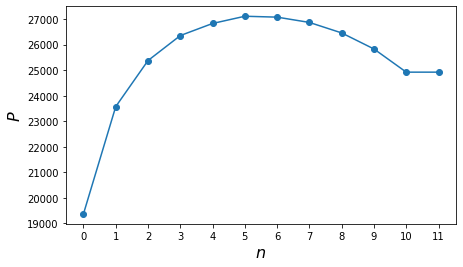

In [365]:
fig,ax = plt.subplots(1,figsize=(7,4))
ax.plot(bars,pay,"o-");
ax.set_xticks(bars);
ax.set_xlabel(r"$n$",fontsize = 16)
ax.set_ylabel(r"$P$",fontsize = 16);
plt.savefig("./single_10.pdf")

# Two queues two servers

In [159]:
# Event Types
ARRIVE = 0
DEPART0 = 1
DEPART1 = 2

# Server States
IDLE = 0
BUSY = 1

In [336]:
import random
class twoQueues(object):
    '''
    This class holds the attributes and methods for the simulation of M/M/s
    queueing system
    '''
    def __init__(self, IAT = 3, ST = 8, 
                 server_num = 1, queueing_mode = 'double', bar0 = 3,bar1 = 3):
        '''
        Constructor of the class, sets initial values for class attributes
        Post: self.ii, self.seed, self.IAT, self.ST, self.currentTime,
        self.eventTable, self.waitingTime, self.TIS, self.serviceTime,
        self.eventCounter, self.customerCounter, self.server, self.sqList
        self.pi
        '''
        self.bar0 = bar0
        self.bar1 = bar1
        self.ii = 0
#         seed(seedInput)
#         self.seed = seedInput
        self.IAT = IAT
        self.ST = ST
        self.clock = []

        self.currentTime = 0.0
#         self.queueSize = {}
        self.queueLen = []
        self.eventTable = []
        self.waitingTime = {}
        self.TIS = {}
        self.serviceTime = {}
        self.eventCounter = 0
        self.customerCounter = 0
        self.eventCounter = 0
        
        self.customerLow = [0,0]
        self.customerHigh = [0,0]
        
        self.server = [IDLE for i in range(server_num)]
        self.sqList = [Queue() for i in range(server_num)]
#         self.numberInSystem = []
        self.add_event(ARRIVE, self.currentTime)
        

    def simulate(self, simulationLength):
        '''
        Simulates the system for simulationLength time units
        '''
        while self.currentTime <= simulationLength:
            event = self.get_event()
            self.process_event(event)
            
    def which_queue(self):
        '''
        When an arrival occurs this methods is called if  there is an available
        server this method returns to the tuple of (queue,server) where queue
        represents the queue that the customer should join and server is one of
        the available servers if there is no available server, server value
        returned is None
        '''
        # Single server policy
        for i in range(server_num):
            if self.sqList[i].isEmpty():
                if self.server[i] == IDLE:
                    self.server[i] = BUSY
                    return i, 1

        if self.sqList[0].size() < self.sqList[1].size():
            return 0, None
        elif self.sqList[0].size() > self.sqList[1].size():
            return 1, None
        else:
            return random.choice([0,1]), None
        
#         return 0, None
    
# need to consider which_queue: the first arrival needs to depart        
    def process_event(self, event):
        '''
        processes event given and updates sqList and eventTable accordingly
        '''
#         self.queueSize[self.currentTime] = self.sqList[0].size()
#         print(self.seed)
        self.eventCounter += 1
        self.clock.append(self.currentTime)

        eventTime, eventType = event
        
        if eventType == ARRIVE: 
            
            serviceTime = expovariate(1.0/self.ST)            
            
            self.add_event(ARRIVE, self.currentTime + expovariate(1.0/self.IAT))
            
            whichQueue, whichServer = self.which_queue()
            
#             print(self.sqList[0].size(), self.sqList[1].size(), whichQueue)
            
            if (self.sqList[0].size() + self.sqList[1].size()) <= 20:
                
                if whichServer == None:
                    self.sqList[whichQueue].enqueue(Customer(self.currentTime, 
                                                             serviceTime, 
                                                             self.customerCounter))
                else:
                    self.waitingTime[self.customerCounter] = 0
                    self.serviceTime[self.customerCounter] = serviceTime
                    
                    if whichQueue == 0:
                        self.add_event(DEPART0, self.currentTime + serviceTime)
                    elif whichQueue == 1:
                        self.add_event(DEPART1, self.currentTime + serviceTime)
                        
                self.customerCounter += 1
                
                                   
        elif eventType == DEPART0:

            q = self.sqList[0]
            if not q.isEmpty():                    
                customer = q.dequeue()
                if q.size() <= self.bar0:
                    customer.serviceTime *= 2
                    self.customerLow[0] += 1
                else:
                    self.customerHigh[0] += 1
                    
                self.waitingTime[customer.number] = (self.currentTime - 
                                                     customer.entryTime)
                self.serviceTime[customer.number] = customer.serviceTime
                self.add_event(DEPART0, self.currentTime + customer.serviceTime)
            else:
                self.server[0] = IDLE
                

        elif eventType == DEPART1:

            q = self.sqList[1]
            if not q.isEmpty():                    
                customer = q.dequeue()
                if q.size() < self.bar1:
                    customer.serviceTime *= 2
                    self.customerLow[1] += 1
                else:
                    self.customerHigh[1] += 1
                    
                self.waitingTime[customer.number] = (self.currentTime - 
                                                     customer.entryTime)
                self.serviceTime[customer.number] = customer.serviceTime
                self.add_event(DEPART1, self.currentTime + customer.serviceTime)
            else:
                self.server[1] = IDLE

                
                
        else:
            print("Unknown event type")

    def add_event(self, eventType, eventTime):
        '''
        Adds event to the eventTable
        '''        
        self.eventCounter += 1
        heapq.heappush(self.eventTable, (eventTime, eventType))
        
    def get_event(self):
        '''
        Gets the first event in the event table
        '''        
        eventTime, eventType = heapq.heappop(self.eventTable)
        self.currentTime = eventTime
        return (eventTime, eventType)
    
    def stat(self):
        '''
        Print statistics to stdout.
        '''
        for k in self.waitingTime:
            self.TIS[k] = self.waitingTime[k] + self.serviceTime[k]
        n1 = len(self.waitingTime)
        n2 = len(self.serviceTime)
        n3 = len(self.TIS)
        av1 = sum(self.waitingTime.values())/n1
        av2 = sum(self.serviceTime.values())/n2
        av3 = sum(self.TIS.values())/n3
        meanQueueLen = 0
        for i in range(2000,len(self.queueLen)):
            meanQueueLen += self.queueLen[i] * (self.clock[i] - self.clock[i-1])/(self.clock[-1]
                                                                                  -self.clock[2000])
            
        return self.customerLow[0], self.customerLow[1], self.customerHigh[0],self.customerHigh[1]      
            

In [439]:
# payoff = 10*totalCustomer - 5*high - 2*low
def payoff2(high0,low0,high1,low1):
    pay0 = []
    pay1 = []
    N = []
    for i in range(len(low0)):
        N.append(high0[i] + low0[i] + high1[i] + low1[i]) 
        pay0.append(10*N[i] - 5*high0[i]  - 2*low0[i] + 4*(high0[i] + low0[i]) )
        pay1.append(10*N[i] - 5*high1[i]  - 2*low1[i] +  4*(high1[i] + low1[i]) )
    return pay0, pay1

In [426]:
# S1: 0high1high
# if queue length >= 10, the customer will leave.
# test the server's total payoff 
if __name__ == '__main__':

# def two_queue()
    length = 5000
    server_num = 2
    IAT = 0.5
    ST = 0.8
#     bars = np.linspace(0,11,12)
#     m = len(bars)
    m = 1
    meanNumber2 = [0]*m
    meanDelay2 = [0]*m
    low0 = [0]*m
    high0 = [0]*m  
    low1 = [0]*m
    high1 = [0]*m  
    for i in range(m): 
        seed(1234567)
        n = 30
        number = [0]*n
        delay = [0]*n
        customerLow0 = [0]*n
        customerHigh0 = [0]*n
        customerLow1 = [0]*n
        customerHigh1 = [0]*n
        for j in range(n):             
            eq = twoQueues(IAT = IAT, ST = ST,server_num = server_num, queueing_mode = 'double', 
                           bar0 = -float('Inf'), bar1 = -float('Inf'))   
            
            eq.simulate(length)        
            
            customerLow0[j], customerLow1[j], customerHigh0[j], customerHigh1[j]= eq.stat()    
            
        low0[i] = np.mean(customerLow0)
        high0[i] = np.mean(customerHigh0)
        low1[i] = np.mean(customerLow1)
        high1[i] = np.mean(customerHigh1)
        
# bars = np.linspace(0,11,12)
# pay0 = payoff2(high0, low0)
s1pay0, s1pay1 = payoff2(high0,low0,high1,low1)
print(s1pay0, s1pay1)
# fig,ax = plt.subplots(1,figsize=(7,4))
# ax.plot(bars, s4pay0,'o-', label = "Server 0")
# ax.plot(bars, s4pay1, 'o-', label = "Server 1")
# ax.legend()
# ax.set_xlabel(r"$n$",fontsize = 16)
# ax.set_ylabel(r"$P$",fontsize = 16);
# ax.set_xticks(bars)
# plt.savefig("./0bar1high.pdf")

[52049.0] [52087.49999999999]


In [424]:
# S2: 0low1low
# if queue length >= 10, the customer will leave.
# test the server's total payoff 
if __name__ == '__main__':

# def two_queue()
    length = 5000
    server_num = 2
    IAT = 0.5
    ST = 0.8
#     bars = np.linspace(0,11,12)
#     m = len(bars)
    m = 1
    meanNumber2 = [0]*m
    meanDelay2 = [0]*m
    low0 = [0]*m
    high0 = [0]*m  
    low1 = [0]*m
    high1 = [0]*m  
    for i in range(m): 
        seed(1234567)
        n = 30
        number = [0]*n
        delay = [0]*n
        customerLow0 = [0]*n
        customerHigh0 = [0]*n
        customerLow1 = [0]*n
        customerHigh1 = [0]*n
        for j in range(n):             
            eq = twoQueues(IAT = IAT, ST = ST,server_num = server_num, queueing_mode = 'double', 
                           bar0 = float('Inf'), bar1 = float('Inf'))   
            
            eq.simulate(length)        
            
            customerLow0[j], customerLow1[j], customerHigh0[j], customerHigh1[j]= eq.stat()    
            
        low0[i] = np.mean(customerLow0)
        high0[i] = np.mean(customerHigh0)
        low1[i] = np.mean(customerLow1)
        high1[i] = np.mean(customerHigh1)
        
# bars = np.linspace(0,11,12)
# pay0 = payoff2(high0, low0)
s2pay0, s2pay1 = payoff2(high0,low0,high1,low1)
print(s2pay0, s2pay1)
# fig,ax = plt.subplots(1,figsize=(7,4))
# ax.plot(bars, s4pay0,'o-', label = "Server 0")
# ax.plot(bars, s4pay1, 'o-', label = "Server 1")
# ax.legend()
# ax.set_xlabel(r"$n$",fontsize = 16)
# ax.set_ylabel(r"$P$",fontsize = 16);
# ax.set_xticks(bars)
# plt.savefig("./0bar1high.pdf")

[56291.8] [56274.8]


In [425]:
low0

[3122.6]

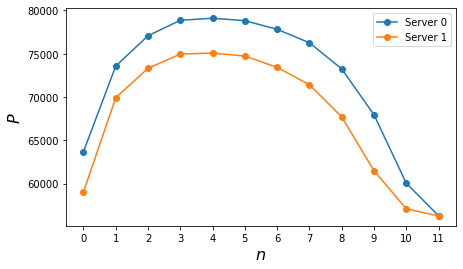

In [427]:
# S3: 0bar1bar
# if queue length >= 10, the customer will leave.
# test the server's total payoff 
if __name__ == '__main__':

# def two_queue()
    length = 5000
    server_num = 2
    IAT = 0.5
    ST = 0.8
    bars = np.linspace(0,11,12)
    m = len(bars)
    meanNumber2 = [0]*m
    meanDelay2 = [0]*m
    low0 = [0]*m
    high0 = [0]*m  
    low1 = [0]*m
    high1 = [0]*m  
    for i in range(m): 
        seed(1234567)
        n = 30
        number = [0]*n
        delay = [0]*n
        customerLow0 = [0]*n
        customerHigh0 = [0]*n
        customerLow1 = [0]*n
        customerHigh1 = [0]*n
        for j in range(n):             
            eq = twoQueues(IAT = IAT, ST = ST,server_num = server_num, queueing_mode = 'double', 
                           bar0 = bars[i], bar1 =bars[i])   
            
            eq.simulate(length)        
            
            customerLow0[j], customerLow1[j], customerHigh0[j], customerHigh1[j]= eq.stat()    
            
        low0[i] = np.mean(customerLow0)
        high0[i] = np.mean(customerHigh0)
        low1[i] = np.mean(customerLow1)
        high1[i] = np.mean(customerHigh1)
        
# bars = np.linspace(0,11,12)
# pay0 = payoff2(high0, low0)
s3pay0, s3pay1 = payoff2(high0,low0,high1,low1)
fig,ax = plt.subplots(1,figsize=(7,4))
ax.plot(bars, s3pay0,'o-', label = "Server 0")
ax.plot(bars, s3pay1, 'o-', label = "Server 1")
ax.legend()
ax.set_xlabel(r"$n$",fontsize = 16)
ax.set_ylabel(r"$P$",fontsize = 16);
ax.set_xticks(bars)
plt.savefig("./0bar1bar.pdf")

In [429]:
s3pay0

[63688.266666666656,
 73572.83333333331,
 77076.66666666669,
 78860.23333333334,
 79095.79999999999,
 78813.2,
 77816.33333333333,
 76265.83333333333,
 73249.33333333334,
 67949.0,
 60052.33333333333,
 56291.8]

In [430]:
s3pay1

[59043.33333333333,
 69921.96666666665,
 73315.93333333333,
 74959.96666666666,
 75075.59999999999,
 74724.79999999999,
 73423.26666666666,
 71417.66666666666,
 67708.66666666667,
 61491.299999999996,
 57088.26666666666,
 56274.8]

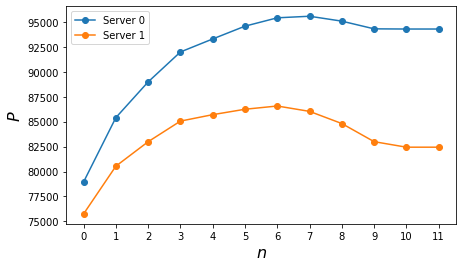

In [440]:
# S4: 0bar1high
# if queue length >= 10, the customer will leave.
# test the server's total payoff 
if __name__ == '__main__':

# def two_queue()
    length = 5000
    server_num = 2
    IAT = 0.5
    ST = 0.8
    bars = np.linspace(0,11,12)
    m = len(bars)
    meanNumber2 = [0]*m
    meanDelay2 = [0]*m
    low0 = [0]*m
    high0 = [0]*m  
    low1 = [0]*m
    high1 = [0]*m  
    for i in range(m): 
        seed(1234567)
        n = 30
        number = [0]*n
        delay = [0]*n
        customerLow0 = [0]*n
        customerHigh0 = [0]*n
        customerLow1 = [0]*n
        customerHigh1 = [0]*n
        for j in range(n):             
            eq = twoQueues(IAT = IAT, ST = ST,server_num = server_num, queueing_mode = 'double', 
                           bar0 = bars[i], bar1 = -float('Inf'))   
            
            eq.simulate(length)        
            
            customerLow0[j], customerLow1[j], customerHigh0[j], customerHigh1[j]= eq.stat()    
            
        low0[i] = np.mean(customerLow0)
        high0[i] = np.mean(customerHigh0)
        low1[i] = np.mean(customerLow1)
        high1[i] = np.mean(customerHigh1)
        
# bars = np.linspace(0,11,12)
# pay0 = payoff2(high0, low0)
s4pay0, s4pay1 = payoff2(high0,low0,high1,low1)
fig,ax = plt.subplots(1,figsize=(7,4))
ax.plot(bars, s4pay0,'o-', label = "Server 0")
ax.plot(bars, s4pay1, 'o-', label = "Server 1")
ax.legend()
ax.set_xlabel(r"$n$",fontsize = 16)
ax.set_ylabel(r"$P$",fontsize = 16);
ax.set_xticks(bars)
plt.savefig("./0bar1high_.pdf")

In [432]:
s4pay0

[63688.266666666656,
 69843.36666666667,
 73520.13333333335,
 76610.06666666667,
 78241.36666666667,
 79760.29999999999,
 80961.70000000001,
 81567.53333333334,
 81707.70000000001,
 81818.0,
 82192.4,
 82192.4]

In [433]:
s4pay1

[59043.33333333333,
 62030.333333333336,
 63286.66666666668,
 64335.833333333336,
 64333.33333333333,
 64371.0,
 64147.50000000001,
 63350.166666666664,
 61970.0,
 59980.99999999999,
 59237.0,
 59237.0]

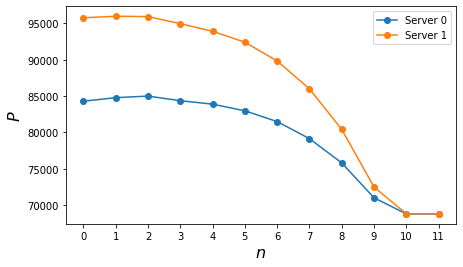

In [441]:
# S5: 0bar1low
# if queue length >= 10, the customer will leave.
# test the server's total payoff 
if __name__ == '__main__':

# def two_queue()
    length = 5000
    server_num = 2
    IAT = 0.5
    ST = 0.8
    bars = np.linspace(0,11,12)
    m = len(bars)
    meanNumber2 = [0]*m
    meanDelay2 = [0]*m
    low0 = [0]*m
    high0 = [0]*m  
    low1 = [0]*m
    high1 = [0]*m  
    for i in range(m): 
        seed(1234567)
        n = 30
        number = [0]*n
        delay = [0]*n
        customerLow0 = [0]*n
        customerHigh0 = [0]*n
        customerLow1 = [0]*n
        customerHigh1 = [0]*n
        for j in range(n):             
            eq = twoQueues(IAT = IAT, ST = ST,server_num = server_num, queueing_mode = 'double', 
                           bar0 = bars[i], bar1 = float('Inf'))   
            
            eq.simulate(length)        
            
            customerLow0[j], customerLow1[j], customerHigh0[j], customerHigh1[j]= eq.stat()    
            
        low0[i] = np.mean(customerLow0)
        high0[i] = np.mean(customerHigh0)
        low1[i] = np.mean(customerLow1)
        high1[i] = np.mean(customerHigh1)
        
# bars = np.linspace(0,11,12)
# pay0 = payoff2(high0, low0)
s5pay0, s5pay1 = payoff2(high0,low0,high1,low1)
fig,ax = plt.subplots(1,figsize=(7,4))
ax.plot(bars, s5pay0,'o-', label = "Server 0")
ax.plot(bars, s5pay1, 'o-', label = "Server 1")
ax.legend()
ax.set_xlabel(r"$n$",fontsize = 16)
ax.set_ylabel(r"$P$",fontsize = 16);
ax.set_xticks(bars)
plt.savefig("./0bar1low_.pdf")

In [435]:
s5pay0

[60700.76666666665,
 61268.76666666668,
 61611.899999999994,
 61325.03333333333,
 61389.63333333334,
 61128.13333333333,
 60622.033333333326,
 59723.899999999994,
 58583.299999999996,
 57040.03333333333,
 56291.8,
 56291.8]

In [436]:
s5pay1

[83506.73333333331,
 83583.93333333335,
 83443.4,
 82505.86666666667,
 81356.26666666668,
 79814.86666666667,
 77279.46666666666,
 73513.4,
 67962.0,
 59971.066666666666,
 56274.8,
 56274.8]

In [437]:
# S6: 0high1low
# if queue length >= 10, the customer will leave.
# test the server's total payoff 
if __name__ == '__main__':

# def two_queue()
    length = 5000
    server_num = 2
    IAT = 0.5
    ST = 0.8
#     bars = np.linspace(0,11,12)
#     m = len(bars)
    m = 1
    meanNumber2 = [0]*m
    meanDelay2 = [0]*m
    low0 = [0]*m
    high0 = [0]*m  
    low1 = [0]*m
    high1 = [0]*m  
    for i in range(m): 
        seed(1234567)
        n = 30
        number = [0]*n
        delay = [0]*n
        customerLow0 = [0]*n
        customerHigh0 = [0]*n
        customerLow1 = [0]*n
        customerHigh1 = [0]*n
        for j in range(n):             
            eq = twoQueues(IAT = IAT, ST = ST,server_num = server_num, queueing_mode = 'double', 
                           bar0 = -float('Inf'), bar1 = float('Inf'))   
            
            eq.simulate(length)        
            
            customerLow0[j], customerLow1[j], customerHigh0[j], customerHigh1[j]= eq.stat()    
            
        low0[i] = np.mean(customerLow0)
        high0[i] = np.mean(customerHigh0)
        low1[i] = np.mean(customerLow1)
        high1[i] = np.mean(customerHigh1)
        
# bars = np.linspace(0,11,12)
# pay0 = payoff2(high0, low0)
s6pay0, s6pay1 = payoff2(high0,low0,high1,low1)
print(s6pay0, s6pay1)
# fig,ax = plt.subplots(1,figsize=(7,4))
# ax.plot(bars, s5pay0,'o-', label = "Server 0")
# ax.plot(bars, s5pay1, 'o-', label = "Server 1")
# ax.legend()
# ax.set_xlabel(r"$n$",fontsize = 16)
# ax.set_ylabel(r"$P$",fontsize = 16);
# ax.set_xticks(bars)
# plt.savefig("./0bar1low.pdf")

[59080.000000000015] [81964.8]
